<a href="https://colab.research.google.com/github/Varun1299/Spectral-Clustering/blob/master/Spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

In [0]:
G=nx.Graph()

In [0]:
G.add_edge(1,2, weight = 1)
G.add_edge(1,3, weight = 1)
G.add_edge(2,3, weight = 1)
G.add_edge(2,4, weight = 0.2)
G.add_edge(4,5, weight = 1)
G.add_edge(5,6, weight = 1)
G.add_edge(4,6, weight = 1)

In [59]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [0]:
A = nx.adjacency_matrix(G)

In [61]:
print(A.todense())
print(-1*A.todense())

[[0.  1.  1.  0.  0.  0. ]
 [1.  0.  1.  0.2 0.  0. ]
 [1.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.  1.  1. ]
 [0.  0.  0.  1.  0.  1. ]
 [0.  0.  0.  1.  1.  0. ]]
[[ 0.  -1.  -1.   0.   0.   0. ]
 [-1.   0.  -1.  -0.2  0.   0. ]
 [-1.  -1.   0.   0.   0.   0. ]
 [ 0.  -0.2  0.   0.  -1.  -1. ]
 [ 0.   0.   0.  -1.   0.  -1. ]
 [ 0.   0.   0.  -1.  -1.   0. ]]


In [0]:
D = np.zeros((len(G.nodes), len(G.nodes)))  

In [63]:
D = np.zeros((len(G.nodes), len(G.nodes)))  
indexer = 0
for node in G.nodes:
  D[indexer][indexer] = G.degree(node)
  indexer += 1
print(D)
print(G.degree(6))

[[2. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]
2


In [0]:
L = D - A

In [65]:
L

matrix([[ 2. , -1. , -1. ,  0. ,  0. ,  0. ],
        [-1. ,  3. , -1. , -0.2,  0. ,  0. ],
        [-1. , -1. ,  2. ,  0. ,  0. ,  0. ],
        [ 0. , -0.2,  0. ,  3. , -1. , -1. ],
        [ 0. ,  0. ,  0. , -1. ,  2. , -1. ],
        [ 0. ,  0. ,  0. , -1. , -1. ,  2. ]])

In [0]:
for rowidx in range(L.shape[0]):
  L[rowidx] = L[rowidx]/float(L[rowidx, rowidx])

In [67]:
L

matrix([[ 1.        , -0.5       , -0.5       ,  0.        ,  0.        ,
          0.        ],
        [-0.33333333,  1.        , -0.33333333, -0.06666667,  0.        ,
          0.        ],
        [-0.5       , -0.5       ,  1.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , -0.06666667,  0.        ,  1.        , -0.33333333,
         -0.33333333],
        [ 0.        ,  0.        ,  0.        , -0.5       ,  1.        ,
         -0.5       ],
        [ 0.        ,  0.        ,  0.        , -0.5       , -0.5       ,
          1.        ]])

In [68]:
L.item((1,1))

1.0

In [0]:
eigvals,eigvecs = np.linalg.eig(L)

In [70]:

eigvecs

matrix([[-4.35194140e-01, -4.45629685e-01, -7.07106781e-01,
          3.23498320e-01,  3.03356177e-01, -1.11459175e-03],
        [-3.48155312e-01, -3.20668626e-01, -4.49559703e-15,
         -5.39163866e-01, -5.62094351e-01,  1.83111978e-16],
        [-4.35194140e-01, -4.45629685e-01,  7.07106781e-01,
          3.23498320e-01,  3.03356177e-01,  1.11459175e-03],
        [-3.48155312e-01,  3.20668626e-01, -2.06055195e-16,
         -5.39163866e-01,  5.62094351e-01, -2.66912227e-16],
        [-4.35194140e-01,  4.45629685e-01,  5.90229285e-17,
          3.23498320e-01, -3.03356177e-01, -7.07105903e-01],
        [-4.35194140e-01,  4.45629685e-01,  3.12673328e-17,
          3.23498320e-01, -3.03356177e-01,  7.07105903e-01]])

In [71]:
eigvals

array([0.1       , 0.14020729, 1.5       , 1.33333333, 1.42645938,
       1.5       ])

In [0]:
num_clusters = 2

In [0]:
selected_eigvecs = []
while len(selected_eigvecs) < num_clusters:
  idx = np.where(eigvals == min(eigvals))
  for i in idx[0]:
    selected_eigvecs.append(np.array(eigvecs[i])[0])
    if len(selected_eigvecs) == num_clusters:
      break
selected_eigvecs = np.array(selected_eigvecs)

In [74]:
nodes = []
for i in range(len(G.nodes)):
  nodes.append(selected_eigvecs[:, i])
nodes

[array([-0.43519414, -0.43519414]),
 array([-0.44562968, -0.44562968]),
 array([-0.70710678, -0.70710678]),
 array([0.32349832, 0.32349832]),
 array([0.30335618, 0.30335618]),
 array([-0.00111459, -0.00111459])]

In [0]:
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(nodes)

In [76]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<function matplotlib.pyplot.show>

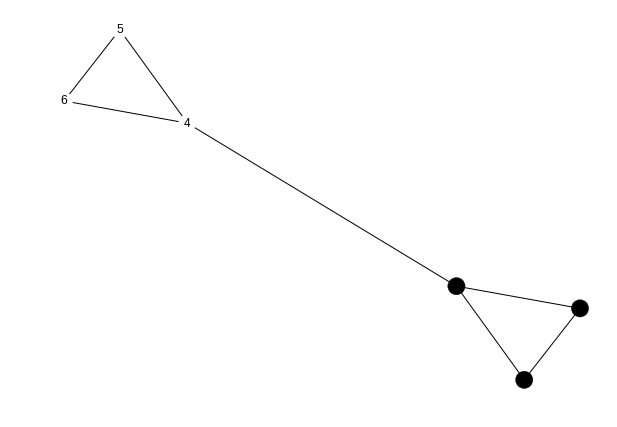

In [77]:
nx.draw(G, pos=nx.spring_layout(G), with_labels = True, node_color = kmeans.labels_)
plt.show

In [0]:
def _readData(inpFile, inpType = 'graph'):
  """Reads data from input file and interprets the data as per the input type.
     It constructs a graph using networkX from the data and returns it."""
  if inpType == 'graph':
    G = nx.graph()
    file = open(inpFile, 'r')
    while True:
      line = file.readline()
      if not line:
        break
      info = line.split(',')
      if len(info) == 3:
        G.add_edge(info[0],info[1], weight = float(info[2][:-1]))
      else:
        G.add_edge(info[0],info[1])
    file.close()
    return G
  elif inpType == 'points':
    points = []
    file = open(inpFile, 'r')
    while True:
      line = file.readline()
      if not line:
        break
      points.append(np.array(list(map(float, line.strip().split(',')))))
    file.close()
    G = nx.graph()
    for i in range(len(points)):
      for j in range(i+1, len(points)):
        dist = np.linalg.norm(points[i], points[j])
        sim = math.exp(-1*dist)
        G.add_edge(i,j, weight = sim)
    return G
  else:
    raise Exception("Specified input type not supported!")

In [0]:
def _constructNormalizedLaplacian(G):
  L = -1*nx.adjacency_matrix(G)
  nodes = list(G.nodes())
  for i in range(len(nodes)):
    L[i] = G.degree(nodes[i])
  for rowidx in range(L.shape[0]):
    L[rowidx] = L[rowidx]/float(L[rowidx, rowidx])
  return L

In [0]:
def _selectEigVecs(eigvals, eigvecs, num_clusters):
  selected_eigvecs = []
  while len(selected_eigvecs) < num_clusters:
    idx = np.where(eigvals == min(eigvals))
    for i in idx[0]:
      selected_eigvecs.append(np.array(eigvecs[i])[0])
      if len(selected_eigvecs) == num_clusters:
        break
  selected_eigvecs = np.array(selected_eigvecs)
  return selected_eigvecs

In [0]:
def _makeNodes(selectedEigVecs, num_nodes):
  nodes = []
  for i in range(num_nodes):
    nodes.append(selectedEigVecs[:,i])

In [0]:
def spectralClustering(inpFile, inpType, num_clusters = 2):
  G = _readData(inpFile, inpType)
  L = _constructNormalizedLaplacian(G)
  eigvals,eigvecs = np.linalg.eig(L)
  selectedEigVecs = _selectEigVecs(eigvals, eigvecs, num_clusters)
  nodes = _makeNodes(selectedEigVecs, len(G.nodes))
  kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++').fit(nodes)
  print(kmeans.labels_)

In [83]:
s = "1,2,3\n"
s = s.strip().split(',')
# l = s.split(',')
print(s)

['1', '2', '3']


In [84]:
list(G.nodes())

[1, 2, 3, 4, 5, 6]

In [0]:
l = np.array([[1,2,3], [1,2,3]])

In [86]:
print(l)

[[1 2 3]
 [1 2 3]]


In [87]:
print(l)

[[1 2 3]
 [1 2 3]]
